# Create a valid Directory 

In [1]:
#PATH containing learn, test directories
PATH = "../../data/mnistasjpg1/"

In [2]:
import os
from random import shuffle
import shutil

valid = False
for folder in list(os.listdir(PATH)):
    if folder == 'valid':
        valid = True
        
for folder in list(os.listdir(PATH)):
    #check if the valid folder is available
    if valid == True: 
        print("valid already exists")
        break;
    # Check if the train folder is available
    if folder == 'train':
        # Create the valid directory
        os.mkdir(f"{PATH}valid")
            
        # list of classes
        for Class in list(os.listdir(f"{PATH}train")):
            filesList = os.listdir(f"{PATH}train/{Class}")
            print(f"Size of class {Class}:", len(filesList))
            p = 0.2
            validSize = int(len(filesList)*p)
            print("Size of valid:", validSize)
            # Shuffle the list of files
            #shuffle(filesList)
            validFiles = []
            counter = 0
            for file in filesList:
                if counter < validSize:
                    validFiles.append(file)
                counter = counter+1
            
            # Create a new directory for each class
            os.mkdir(f"{PATH}valid/{Class}")
                
            for file in validFiles:
                shutil.move(f"{PATH}train/{Class}/{file}", f"{PATH}valid/{Class}")
                
print("Done")

valid already exists
Done


# Start 

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [5]:
# what's in our PATH?
!ls {PATH}

models	testSet.tar.gz	train		    Untitled.ipynb
test	tmp		trainingSet.tar.gz  valid


# Get a sample 

In [6]:
images = (os.listdir(f'{PATH}test'))[:10]
images

['img_1.jpg',
 'img_10.jpg',
 'img_100.jpg',
 'img_1000.jpg',
 'img_10000.jpg',
 'img_10001.jpg',
 'img_10002.jpg',
 'img_10003.jpg',
 'img_10004.jpg',
 'img_10005.jpg']

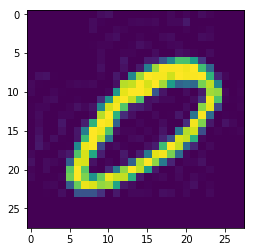

In [7]:
from random import shuffle
shuffle(images)
img = plt.imread(f'{PATH}test/{images[0]}')
plt.imshow(img)

# How computer see images? 

In [8]:
img[10:20, 10:20]

array([[  4, 136, 246, 255, 255, 248,  69,  14,   0,   0],
       [131, 246, 255, 233, 183,  10,  13,   5,   5,   0],
       [239, 253, 187,  23,  20,  10,   0,   0,   0,   0],
       [255, 165,  32,  10,   0,   0,   6,   0,   1,  15],
       [251,  81,   0,   0,   4,   0,   0,   7,   0,   0],
       [185,  12,   3,   3,   0,   4,   0,  13,   0, 100],
       [100,   0,   0,   6,   8,   0,   4,  24,  62, 241],
       [  4,   8,   2,   0,   0,  10,  20, 175, 255, 233],
       [  0,   0,  17,   2,  19, 105, 245, 251, 204,  91],
       [  4,   0,  13,  79, 224, 255, 213, 104,  25,   0]], dtype=uint8)

In [9]:
size = 28 # Size of image
arch = resnet34 # The model used
# Transformations
tfms = tfms_from_model(arch, size, aug_tfms=transforms_basic) # Transforming the data
data = ImageClassifierData.from_paths(PATH, tfms=tfms) # Reads the data and provides a dataset ready for use

In [10]:
data.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [11]:
# Create the Learner(Model)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [12]:
learn.fit(0.01, 3) # Training with 3 epoches

epoch      trn_loss   val_loss   accuracy                     
    0      0.419888   0.224286   0.931158  
    1      0.342952   0.181333   0.94152                      
    2      0.283241   0.173157   0.943306                     



[0.1731565228852844, 0.9433063363790398]

In [13]:
learn.precompute = False # Turn off precompute to use data augmentation

In [14]:
learn.fit(1e-2, 3, cycle_len=1) # Training with 3 epoches

epoch      trn_loss   val_loss   accuracy                    
    0      0.277207   0.163513   0.947118  
    1      0.287341   0.16205    0.947951                    
    2      0.271832   0.155472   0.949023                    



[0.15547160912889024, 0.9490233445065314]

In [15]:
# solve under fitting by giving the learner a longer look at the data
learn.fit(1e-2, 3, cycle_len=1, cycle_mult= 2)# 3 cycles(each has 1 epoch) with mult = 1 + 2 + 4 = 7 epoches

epoch      trn_loss   val_loss   accuracy                    
    0      0.282788   0.156602   0.948785  
    1      0.244086   0.152879   0.949262                    
    2      0.27182    0.147022   0.952716                    
    3      0.283931   0.147069   0.952954                    
    4      0.256321   0.138928   0.953668                    
    5      0.244295   0.141736   0.951882                    
    6      0.228492   0.135583   0.957122                    



[0.13558276977324382, 0.9571224393135823]

In [16]:
lrf = learn.lr_find() # Finding the best learning rate

 77%|███████▋  | 405/526 [00:10<00:03, 33.67it/s, loss=0.753]

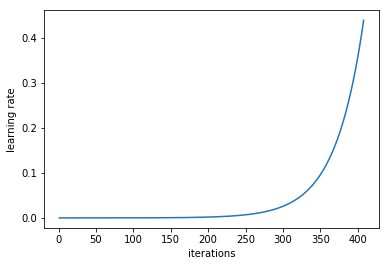

In [17]:
learn.sched.plot_lr()

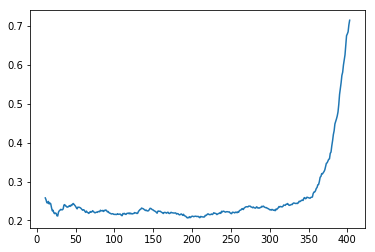

In [18]:
learn.sched.plot_loss()

In [19]:
lr = 1e-2; lr

0.01

In [20]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.249524   0.135771   0.955574  
    1      0.222892   0.144002   0.953668                    
    2      0.274865   0.137411   0.954621                    
    3      0.260552   0.141605   0.955217                    
    4      0.248417   0.130475   0.956408                    
    5      0.267781   0.127809   0.958671                    
    6      0.193512   0.128279   0.957718                    


[0.12827905842864895, 0.9577179609905714]

In [21]:
# Differential learning rates
lrs = np.array([lr/9, lr/3, lr]) # Set a learning rate for each group of layers

In [22]:
learn.unfreeze() #unfreeze the earlier layers to train instead of the last one only

In [23]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                     
    0      0.169999   0.054598   0.984636  
    1      0.121447   0.043092   0.987851                     
    2      0.1025     0.03197    0.990233                     
    3      0.115372   0.038345   0.988923                     
    4      0.036802   0.029696   0.992139                     
    5      0.079188   0.026716   0.992735                     
    6      0.067888   0.026073   0.992377                     


[0.026072505176450708, 0.9923773225345403]

In [24]:
learn.save('All') # Saving 

In [25]:
learn.load('All') # Loading

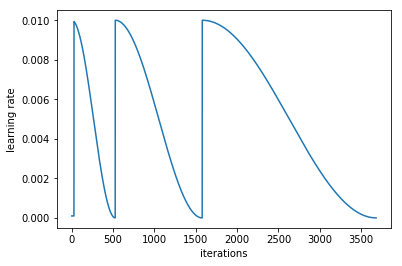

In [26]:
learn.sched.plot_lr() # The Change of Learning rate each cycle (SGDR)

In [27]:
log_preds, y = learn.TTA() # Test Time Augmentation, gives a better accuracy

In [28]:
probs = np.mean(np.exp(log_preds), 0)

# Accuracy 

In [29]:
accuracy_np(probs, y), metrics.log_loss(y, probs)

(0.9924964268699381, 0.024906631818477964)

In [30]:
# confusion matrix
preds = np.argmax(probs, axis=1)
probs = probs[:, 1]

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[824   0   0   0   0   0   0   1   1   0]
 [  0 934   0   0   0   0   0   2   0   0]
 [  0   0 829   0   0   0   0   4   2   0]
 [  0   1   1 865   0   2   0   0   0   1]
 [  0   2   0   0 799   0   1   6   1   5]
 [  1   0   0   4   0 753   0   0   1   0]
 [  1   1   1   0   1   0 822   0   1   0]
 [  0   3   1   0   1   0   0 875   0   0]
 [  0   0   2   1   0   1   1   0 803   4]
 [  0   0   0   1   3   2   0   1   1 829]]


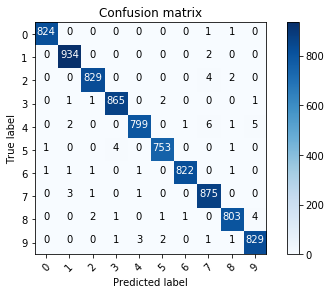

In [32]:
plot_confusion_matrix(cm, data.classes) # True Labels VS predicted Labels